In [1]:
#Sample Dataset

import pandas as pd

pizza = {'diameter': [6, 8, 10, 14, 18],
'harga': [7, 9, 13, 17.5, 18]
}

pizza_df = pd.DataFrame(pizza)
pizza_df

,diameter,harga
0,6,7.0
1,8,9.0
2,10,13.0
3,14,17.5
4,18,18.0


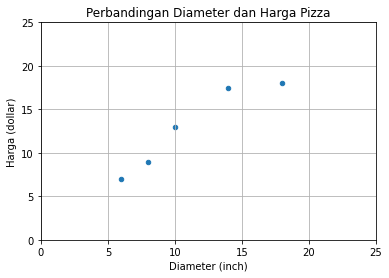

In [2]:
#Visualisasi Data
import matplotlib.pyplot as plt

pizza_df.plot(kind='scatter', x='diameter', y='harga')

plt.title('Perbandingan Diameter dan Harga Pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (dollar)')
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.grid(True)
plt.show()


In [5]:
#Simple Linear Regression Model

#penyesuaian Dataset
import numpy as np

X = np.array(pizza_df['diameter'])
y = np.array(pizza_df['harga'])

X_ori = X

X = X.reshape(-1, 1)

print(f'X: {X}')
print(f'y: {y}')
print(f'X_ori: {X_ori}')

X.shape


X: [[ 6]
 [ 8]
 [10]
 [14]
 [18]]
y: [ 7.   9.  13.  17.5 18. ]
X_ori: [ 6  8 10 14 18]


(5, 1)

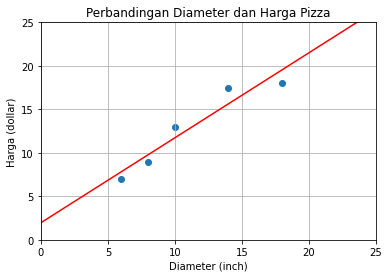

In [6]:
#Training Simple Linear Regression Model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

X_vis = np.array([0, 25]).reshape(-1, 1)
y_vis = model.predict(X_vis)

plt.scatter(X, y)
plt.plot(X_vis, y_vis, '-r')

plt.title('Perbandingan Diameter dan Harga Pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (dollar)')
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.grid(True)
plt.show()


In [7]:
print(f'intercept: {model.intercept_}')
print(f'slope: {model.coef_}')


intercept: 1.965517241379315
slope: [0.9762931]


In [8]:
#Mencari nilai slope
print(f'X: \n{X}\n')
print(f'X flatten: {X.flatten}\n')
print(f'y: {y}')



X: 
[[ 6]
 [ 8]
 [10]
 [14]
 [18]]

X flatten: <built-in method flatten of numpy.ndarray object at 0x000000000A3CE990>

y: [ 7.   9.  13.  17.5 18. ]


In [9]:
#Variance
variance_x = np.var(X.flatten(), ddof=1)
print(f'variance: {variance_x}')


variance: 23.2


In [10]:
#covariance
np.cov(X.flatten(), y)
covariance_xy = np.cov(X.flatten(), y)[0][1]

print(f'covariance: {covariance_xy}')



covariance: 22.65


In [11]:
#Slope
slope = covariance_xy / variance_x

print(f'slope: {slope}')



slope: 0.9762931034482758


In [12]:
#Mencari nilai intercept
intercept = np.mean(y) - slope * np.mean(X)

print(f'intercept: {intercept}')


intercept: 1.9655172413793114


In [16]:
#Prediksi Harga Pizza

diameter_pizza = np.array([12, 20, 23]).reshape(-1, 1)
diameter_pizza

prediksi_harga = model.predict(diameter_pizza)
prediksi_harga

for dmtr, hrg in zip(diameter_pizza, prediksi_harga):
	print(f'Diameter: {dmtr} prediksi harga: {hrg}')



Diameter: [12] prediksi harga: 13.681034482758621
Diameter: [20] prediksi harga: 21.491379310344826
Diameter: [23] prediksi harga: 24.42025862068965


In [18]:
#Training & Testing Dataset
X_train = np.array([6, 8, 10, 14, 18]).reshape(-1, 1)
y_train = np.array([7, 9, 13, 17.5, 18])

X_test = np.array([8, 9, 11, 16, 12]).reshape(-1, 1)
y_test = np.array([11, 8.5, 15, 18, 11])



In [19]:
#Training Simple Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [20]:
#Evaluasi Linear Regression dengan Coefficient of Determination
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)
r_squared = r2_score(y_test, y_pred)

print(f'R-squared: {r_squared}')



R-squared: 0.6620052929422553


In [21]:
#Mencari nilai R2
ss_res = sum([(y_i - model.predict(x_i.reshape(-1, 1))[0])**2
	for x_i, y_i in zip(X_test, y_test)])

print(f'ss_res: {ss_res}')


ss_res: 19.1980993608799


In [22]:
#SStot
mean_y = np.mean(y_test)
ss_tot = sum([(y_i - mean_y)**2 for y_i in y_test])

print(f'ss_tot: {ss_tot}')


ss_tot: 56.8


In [23]:
#R2
r_squared = 1 - (ss_res / ss_tot)

print(f'R-squared: {r_squared}')


R-squared: 0.6620052929422553
